In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [126]:
radii = [1.0, 0.5] # Outer is always first
velocities = [1.0, 2.0]

In [156]:
def draw_earth(radii):
    colors = ['y','b','r','g']
    for i,r in enumerate(radii):
        circle = plt.Circle((0, 0), radius=r,fc=colors[i],alpha=0.3)
        plt.gca().add_patch(circle)
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)


<IPython.core.display.Javascript object>


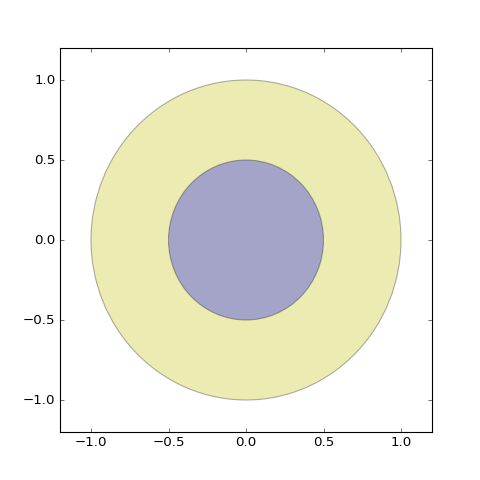

In [157]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x = draw_earth(radii)

In [106]:
def normal(r,x,y):
    return r

def snells(theta0,v0,v1):
    sin_theta1 = np.sin(theta0)*(v1/v0)
    theta1 = np.arcsin(sin_theta1)
    return theta1

def mag(x,y):
    r = np.sqrt(x*x + y*y)
    return r

def rel_angle(x0,y0, x1,y1):
    mag0 = mag(x0,y0)
    mag1 = mag(x1,y1)
    
    cos_theta = (x0*x1 + y0*y1)/(mag0*mag1)
    
    theta = np.arccos(cos_theta)
    return theta

In [8]:
rel_angle(1,1, 0,1)

0.78539816339744839

In [178]:
def linear(m,b,x):
    y = b + m*x
    return y

def radial_dist(x,y):
    r2 = x*x + y*y
    r = np.sqrt(r2)
    return r

def vector_representation(x0,y0, x1,y1, norm=False):
    #theta = np.arctan2(y1-y0,x1-x0)
    dx = x1-x0
    dy = y1-y0
    vec_mag = 1.0
    if norm==True:
        vec_mag = mag(dx,dy)
    x = dx/vec_mag
    y = dy/vec_mag
    #y = vec_mag*np.sin(theta)
    return x,y

def new_y(x0,y0,x1,theta):
    y = (x1-x0)*np.tan(theta) + y0
    return y

In [180]:
vector_representation(3,3,  4,4)

(1.0, 1.0)

In [181]:
def sgn(x):
    if x<0:
        return -1
    else:
        return +1 

def intersection(x1,y1, x2,y2, r):
    dx = x2-x1
    dy = y2-y1
    dr = mag(dx,dy)
    D = x1*y2 - x2*y1
    
    pts = []
    radical = r**2 * dr**2 - D**2 
    if radical<0:
        return None
    else:
        x = (D*dy + sgn(dy)*dx*np.sqrt(radical))/dr**2
        y = (-D*dx + np.abs(dy)*np.sqrt(radical))/dr**2
        pts.append(np.array([x,y]))
        if radical==0:
            return pts
        else:
            x = (D*dy + sgn(dy)*dx*-1*np.sqrt(radical))/dr**2
            y = (-D*dx + np.abs(dy)*-1*np.sqrt(radical))/dr**2
            pts.append(np.array([x,y]))
            return pts

In [182]:
intersection(0.0,-1.0, 0.0, -0.9, 0.5)

[array([ 0. ,  0.5]), array([ 0. , -0.5])]

In [216]:
intercept = -1.0
angle = np.pi/2. - np.deg2rad(4.0)
slope = np.tan(angle)
print slope
x0 = 0.0
y0 = intercept
x = 1.0
y = new_y(x0,y0,x,angle)

rays = []

pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print closest
ray = [[x0,closest[0]],[y0,closest[1]]]
rays.append(ray)


# Next layer
vx,vy = vector_representation(ray[0][1],ray[1][1],x0,y0)
cx = ray[0][1] # Circle x
cy = ray[1][1] # Circle y
t0 = rel_angle(cx,cy,vx,vy)

t1 = snells(t0,velocities[0],velocities[1])
#norm_theta = rel_angle(1.,0.,ray[0][1],ray[1][1])
angle -= (t1-t0) # Change in angle is the difference between t0 and t1

# Get the new point
x0 = closest[0]
y0 = closest[1]
x = x0 + 1.0
y = new_y(x0,y0,x,angle)

print "pts"
pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    furthest = None
    if len(pts)==1:
        furthest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            furthest = pts[1]
        else:
            furthest = pts[0]
            
        print furthest
ray[0].append(furthest[0])
ray[1].append(furthest[1])

print ray

# Get to outside layer
x0 = ray[0][-2]
y0 = ray[1][-2]
x = ray[0][-1]
y = ray[1][-1]
cx = x
cy = y
vx,vy = vector_representation(x0,y0, x,y)
t0 = rel_angle(-cx,-cy,-vx,-vy)
t1 = snells(t0,velocities[0],velocities[1])
print t0,t1
angle += (t0-t1)

x1 = x + 1
y1 = new_y(x,y,x1,angle)

pts = intersection(x,y,x1,y1,radii[0])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x-pts[0][0],y-pts[0][1])
        d1 = mag(x-pts[1][0],y-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print closest

ray[0].append(closest[0])
ray[1].append(closest[1])

14.3006662567
[array([ 0.10412369,  0.48903809]), array([ 0.03504941, -0.49877003])]
[ 0.03504941 -0.49877003]
pts
[array([ 0.23769302,  0.43988866]), array([ 0.03504941, -0.49877003])]
[ 0.23769302  0.43988866]
[[0.0, 0.035049414151161952, 0.23769301800919759], [-1.0, -0.4987700257309578, 0.43988865544553352]]
0.282779566407 0.592036151995
[array([ 0.48699199,  0.87340643]), array([-0.5099418, -0.8602089])]
[ 0.48699199  0.87340643]


<IPython.core.display.Javascript object>


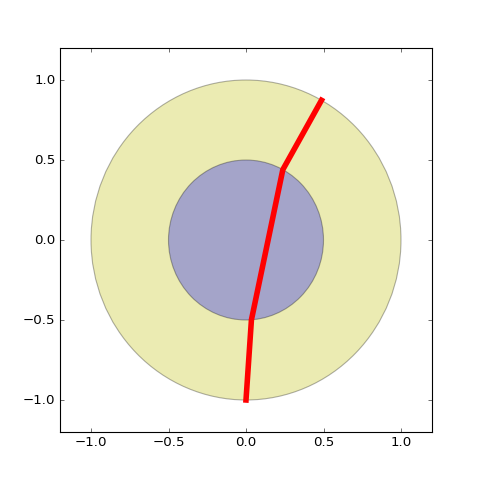

In [217]:
fig = plt.figure(figsize=(6,6))
draw_earth(radii)
plt.plot(ray[0],ray[1],'r-',linewidth=5)